Goal: Read in text files representing cake sales and output reports/visuals showing sales over time.
Useful learnin' things: Practice with dataframes + time series data, making line charts.  

In [11]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
# Read in the files, skipping headers
with open('Delux.txt', 'r', encoding='utf-8') as deluxe_file, open('Basic.txt', 'r') as basic_file, open('Total.txt', 'r') as total_file:
    deluxe = deluxe_file.read().splitlines()[1:]
    basic = basic_file.read().splitlines()[1:]
    total = total_file.read().splitlines()[1:]

In [23]:
# Calculate start date using no. entries (minus one, because we're running it on the same day as the final list item)
start_date = datetime.date.today() - datetime.timedelta(days=len(basic)-1)

# Combine the three sales lists
sales = list(zip(deluxe, basic, total))

# Convert to date frame and add date range as index
df = pd.DataFrame.from_records(sales, columns=['deluxe sales', 'basic sales', 'total revenue'], 
                               index=pd.date_range(start=start_date, end=datetime.date.today()))

df.index.name = 'date'
df.head()

,deluxe sales,basic sales,total revenue
date,,,
2017-01-17,14,4,104
2017-01-18,8,1,53
2017-01-19,3,11,73
2017-01-20,7,11,97
2017-01-21,12,12,132


In [24]:
# Change cols to numeric
df = df.astype(dtype=np.int64, copy=False)

# Add columns for revenue from each cake type
df['deluxe revenue'] = df['deluxe sales'] * 6
df['basic revenue'] = df['basic sales'] * 5

# Re-order columns
cols = ['basic sales', 'basic revenue', 'deluxe sales', 'deluxe revenue', 'total revenue']
df = df[cols]

df.head()

,basic sales,basic revenue,deluxe sales,deluxe revenue,total revenue
date,,,,,
2017-01-17,4,20,14,84,104
2017-01-18,1,5,8,48,53
2017-01-19,11,55,3,18,73
2017-01-20,11,55,7,42,97
2017-01-21,12,60,12,72,132


In [25]:
# Calculate weekly/monthly/annual totals
df_weekly = df.resample('W').sum()
df_monthly = df.resample('M').sum()
df_yearly = df.resample('Y').sum()

In [26]:
# Yearly totals
df_yearly

,basic sales,basic revenue,deluxe sales,deluxe revenue,total revenue
date,,,,,
2017-12-31,2809,14045,2808,16848,30893
2018-12-31,3004,15020,3013,18078,33098
2019-12-31,2422,12110,2270,13620,25730


In [33]:
# Monthly totals
df_monthly

,basic sales,basic revenue,deluxe sales,deluxe revenue,total revenue
date,,,,,
2017-01-31,112,560,108,648,1208
2017-02-28,244,1220,227,1362,2582
2017-03-31,232,1160,281,1686,2846
2017-04-30,267,1335,262,1572,2907
2017-05-31,244,1220,283,1698,2918
2017-06-30,217,1085,165,990,2075
2017-07-31,254,1270,255,1530,2800
2017-08-31,254,1270,290,1740,3010
2017-09-30,264,1320,232,1392,2712


In [82]:
# Weekly totals
df_weekly

,basic sales,basic revenue,deluxe sales,deluxe revenue,total revenue
date,,,,,
2017-01-22,41,205,48,288,493
2017-01-29,46,230,49,294,524
2017-02-05,64,320,49,294,614
2017-02-12,54,270,59,354,624
2017-02-19,80,400,59,354,754
...,...,...,...,...,...
2019-09-15,39,195,56,336,531
2019-09-22,65,325,67,402,727
2019-09-29,59,295,63,378,673


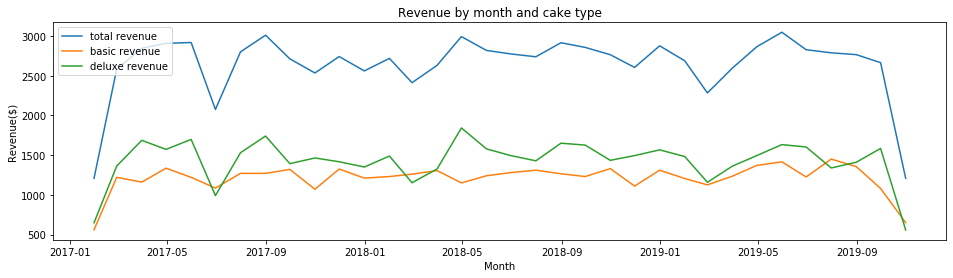

In [72]:
# Plot total revenue + break down by cake type
fig = plt.figure(figsize=(16,4))
categories = ['total revenue', 'basic revenue', 'deluxe revenue']
for c in categories:
    plt.plot(df_monthly.index, df_monthly[c], label=c)

# Add legend, title and axis labels
plt.legend(loc='upper left')
plt.xlabel("Month")
plt.ylabel("Revenue($)")
plt.title("Revenue by month and cake type")
plt.show()

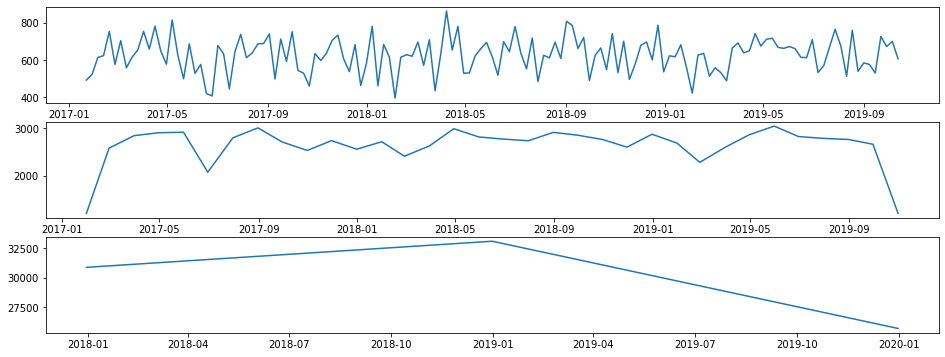

In [81]:
# Plot weekly.monthly.yearly side by side
fig = plt.figure(figsize=(16,6))
ax_weekly = fig.add_subplot(3,1,1)
ax_weekly.plot(df_weekly.index, df_weekly['total revenue'])

ax_monthly = fig.add_subplot(3,1,2)
ax_monthly.plot(df_monthly.index, df_monthly['total revenue'])

ax_yearly = fig.add_subplot(3,1,3)
ax_yearly.plot(df_yearly.index, df_yearly['total revenue'])

plt.show()